**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopzs)** or **[LinkedIn](https://linkedin.com/in/jsulopzs)**

# #01 | Machine Learning & Linear Regression

## Chapter Importance

Machine Learning is all about calculating [the best numbers](https://twitter.com/sotastica/status/1449735653328031745) of a mathematical equation by [minimizing the distance between real data and predictions](https://www.youtube.com/watch?v=Ht3rYS-JilE).

The form of a Linear Regression mathematical equation is as follows:

$$
y = (a) + (b) \cdot x
$$

As we see in the following plot, **not any mathematical equation is valid**; the red line doesn't fit the real data (blue points) as well as the green one.

<center>
<img src="src/linear-regression.jpeg" width="400" align="center">
</center>

How do we understand the development of Machine Learning models in Python **to predict what may happen in the future**?

This tutorial covers the topics described below using **USA Car Crashes data** to predict the accidents based on alcohol.

1. Step by step procedure to compute a Linear Regression:
    1. `.fit()` the numbers of the mathematical equation
    2. `.predict()` the future with the mathematical equation
    3. `.score()` how good is the mathematical equation
2. How to **visualize** the Linear Regression model?
3. How to **evaluate** Regression models step by step?
    - Residuals Sum of Squares
    - Total Sum of Squares
    - R Squared Ratio $R^2$
4. How to **interpret** the coeficients of the Linear Regression?
5. Compare the Linear Regression to other Machine Learning models such as:
    - Random Forest
    - Support Vector Machines
6. Why **we don't need to know the maths** behind every model to apply Machine Learning in Python?

## [ ] Load the Data

- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

Visit [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) if you want to know the measures of the columns.

In [1]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
AZ,5.208,18.6
AR,5.824,22.4
CA,3.360,12.0
CO,3.808,13.6
CT,3.888,10.8
DE,4.860,16.2
DC,1.593,5.9


## How do we compute a `LinearRegression` Model in Python?

### Import the Class

In [2]:
from sklearn.linear_model import LinearRegression

### Instantiate the Class

In [3]:
model_lr = LinearRegression()

### Fit the Model

In [4]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [5]:
target = df_crashes['accidents']
features = df_crashes[['alcohol']]

### Fit the Model Again

In [7]:
model_lr.fit(X=features, y=target)

LinearRegression()

### [ ] Predictions

#### Calculate the Predictions

In [8]:
model_lr.predict(X=features)

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638,
       13.78455074, 20.44100889, 14.87600663, 14.70324359, 14.40446516,
       13.8353634 , 14.54064309, 15.86177218, 19.6076813 , 15.06502971,
       13.98780137, 11.69106925, 13.88211104, 11.5162737 , 16.94713055,
       16.98371566, 24.99585551, 16.45729653, 15.41868581, 12.93089809,
       12.23171592, 15.95526747, 13.10772614, 16.44306899, 26.26007443,
       15.60161138, 17.58737003, 12.62195713, 17.32517672, 14.43088774,
       25.77430543, 18.86988151, 17.3515993 , 20.84141263,  9.53254755,
       14.15040187, 12.82724027, 12.96748321, 19.40239816, 15.11380986,
       17.17477126])

#### Add a New Column with the Predictions

In [9]:
df_crashes['pred_lr'] = model_lr.predict(X=features)
df_crashes

,alcohol,accidents,pred_lr
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
AZ,5.208,18.6,16.443069
AR,5.824,22.4,17.695093
CA,3.360,12.0,12.686997
CO,3.808,13.6,13.597560
CT,3.888,10.8,13.760161
DE,4.860,16.2,15.735757
DC,1.593,5.9,9.095559


### Model Visualization

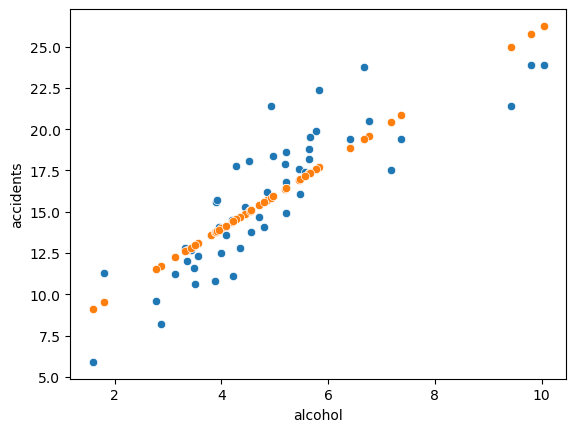

In [12]:
import matplotlib.pyplot as plt
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes)
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes);


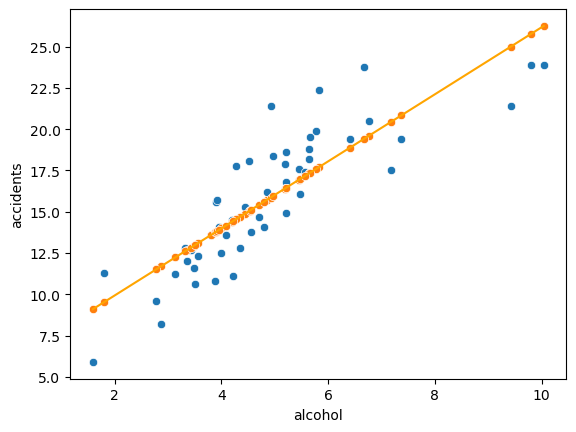

In [13]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes)
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes);
sns.lineplot(x='alcohol', y='pred_lr', data=df_crashes, color='orange');

### [ ] Model's Score

#### Calculate the Score

In [14]:
model_lr.score(X=features, y=target)

0.7269492966665405

#### Explain the Score

##### Residuals

In [15]:
df_crashes['accidents'] - df_crashes['pred_lr']


abbrev
AL    1.478888
AK    3.045133
AZ    2.156931
AR    4.704907
CA   -0.686997
CO    0.002440
CT   -2.960161
DE    0.464243
DC   -3.195559
FL    1.491484
GA    1.815449
HI   -2.941009
ID    0.423993
IL   -1.903244
IN    0.095535
IA    1.864637
KS    3.259357
KY    5.538228
LA    0.892319
ME    0.034970
MD   -1.487801
MA   -3.491069
MI    0.217889
MN   -1.916274
MS    0.652869
MO   -0.883716
MT   -3.595856
NE   -1.557297
NV   -0.718686
NH   -1.330898
NJ   -1.031716
NM    2.444733
NY   -0.807726
NC    0.356931
ND   -2.360074
OH   -1.501611
OK    2.312630
OR    0.178043
PA    0.874823
RI   -3.330888
SC   -1.874305
SD    0.530118
TN    2.148401
TX   -1.441413
UT    1.767452
VT   -0.550402
VA   -0.127240
WA   -2.367483
WV    4.397602
WI   -1.313810
WY    0.225229
dtype: float64

##### Target's Variation

In [16]:
df_crashes['residuals'] = df_crashes['accidents'] - df_crashes['pred_lr']
df_crashes

,alcohol,accidents,pred_lr,residuals
abbrev,,,,
AL,5.640,18.8,17.321112,1.478888
AK,4.525,18.1,15.054867,3.045133
AZ,5.208,18.6,16.443069,2.156931
AR,5.824,22.4,17.695093,4.704907
CA,3.360,12.0,12.686997,-0.686997
CO,3.808,13.6,13.597560,0.002440
CT,3.888,10.8,13.760161,-2.960161
DE,4.860,16.2,15.735757,0.464243
DC,1.593,5.9,9.095559,-3.195559


In [17]:
df_crashes.residuals.sum()

1.7053025658242404e-13

In [18]:
df_crashes.residuals.sum().round(2)

0.0

In [19]:
df_crashes['residuals^2'] = df_crashes.residuals**2
df_crashes


,alcohol,accidents,pred_lr,residuals,residuals^2
abbrev,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111
AK,4.525,18.1,15.054867,3.045133,9.272834
AZ,5.208,18.6,16.443069,2.156931,4.652351
AR,5.824,22.4,17.695093,4.704907,22.136151
CA,3.360,12.0,12.686997,-0.686997,0.471965
CO,3.808,13.6,13.597560,0.002440,0.000006
CT,3.888,10.8,13.760161,-2.960161,8.762551
DE,4.860,16.2,15.735757,0.464243,0.215522
DC,1.593,5.9,9.095559,-3.195559,10.211595


In [20]:
df_crashes['residuals^2'].sum()

231.96888653310063

In [22]:
RSS = df_crashes['residuals^2'].sum()

In [23]:
df_crashes.accidents

abbrev
AL    18.8
AK    18.1
AZ    18.6
AR    22.4
CA    12.0
CO    13.6
CT    10.8
DE    16.2
DC     5.9
FL    17.9
GA    15.6
HI    17.5
ID    15.3
IL    12.8
IN    14.5
IA    15.7
KS    17.8
KY    21.4
LA    20.5
ME    15.1
MD    12.5
MA     8.2
MI    14.1
MN     9.6
MS    17.6
MO    16.1
MT    21.4
NE    14.9
NV    14.7
NH    11.6
NJ    11.2
NM    18.4
NY    12.3
NC    16.8
ND    23.9
OH    14.1
OK    19.9
OR    12.8
PA    18.2
RI    11.1
SC    23.9
SD    19.4
TN    19.5
TX    19.4
UT    11.3
VT    13.6
VA    12.7
WA    10.6
WV    23.8
WI    13.8
WY    17.4
Name: accidents, dtype: float64

In [25]:
df_crashes.accidents.mean()

15.79019607843137

In [26]:
df_crashes.accidents - df_crashes.accidents.mean()

abbrev
AL    3.009804
AK    2.309804
AZ    2.809804
AR    6.609804
CA   -3.790196
CO   -2.190196
CT   -4.990196
DE    0.409804
DC   -9.890196
FL    2.109804
GA   -0.190196
HI    1.709804
ID   -0.490196
IL   -2.990196
IN   -1.290196
IA   -0.090196
KS    2.009804
KY    5.609804
LA    4.709804
ME   -0.690196
MD   -3.290196
MA   -7.590196
MI   -1.690196
MN   -6.190196
MS    1.809804
MO    0.309804
MT    5.609804
NE   -0.890196
NV   -1.090196
NH   -4.190196
NJ   -4.590196
NM    2.609804
NY   -3.490196
NC    1.009804
ND    8.109804
OH   -1.690196
OK    4.109804
OR   -2.990196
PA    2.409804
RI   -4.690196
SC    8.109804
SD    3.609804
TN    3.709804
TX    3.609804
UT   -4.490196
VT   -2.190196
VA   -3.090196
WA   -5.190196
WV    8.009804
WI   -1.990196
WY    1.609804
Name: accidents, dtype: float64

In [27]:
df_crashes['real_residuals'] = df_crashes.accidents - df_crashes.accidents.mean()
df_crashes

,alcohol,accidents,pred_lr,residuals,residuals^2,real_residuals
abbrev,,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111,3.009804
AK,4.525,18.1,15.054867,3.045133,9.272834,2.309804
AZ,5.208,18.6,16.443069,2.156931,4.652351,2.809804
AR,5.824,22.4,17.695093,4.704907,22.136151,6.609804
CA,3.360,12.0,12.686997,-0.686997,0.471965,-3.790196
CO,3.808,13.6,13.597560,0.002440,0.000006,-2.190196
CT,3.888,10.8,13.760161,-2.960161,8.762551,-4.990196
DE,4.860,16.2,15.735757,0.464243,0.215522,0.409804
DC,1.593,5.9,9.095559,-3.195559,10.211595,-9.890196


In [28]:
df_crashes['real_residuals^2'] = df_crashes.real_residuals**2

In [29]:
df_crashes['real_residuals^2'].sum()

849.5450980392156

In [30]:
TSS = df_crashes['real_residuals^2'].sum()

##### The Ratio

In [40]:
RSS/TSS

0.2730507033334595

In [41]:
1 - RSS/TSS

0.7269492966665405

### [ ] Model Interpretation

In [38]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

In [39]:
import pandas as pd

df_to_pred = pd.DataFrame({'alcohol': [1,2,3,4,5]})
df_to_pred['pred_lr'] = 5.857 + 2.032 * df_to_pred.alcohol
df_to_pred['diff'] = df_to_pred.pred_lr.diff()
df_to_pred

,alcohol,pred_lr,diff
0,1,7.889,NaN
1,2,9.921,2.032
2,3,11.953,2.032
3,4,13.985,2.032
4,5,16.017,2.032


## [ ] Other Regression Models

### `RandomForestRegressor()` in Python

In [42]:
from sklearn.ensemble import Rando

ImportError: cannot import name 'Rando' from 'sklearn.ensemble' (C:\Anaconda\lib\site-packages\sklearn\ensemble\__init__.py)

#### Fit the Model

#### Calculate Predictions

#### Model's Score

### `SVR()` in Python

#### Fit the Model

#### Calculate Predictions

#### Model's Score

## Which One Is the Best? Why?

## [ ] Visualize the 3 Models

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.